# Random Forest for ClimateWins

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set a path

path = r'/Users/roxanamiu/Documents/Climate Change project 2'

In [3]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [4]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path,  'Prepared', 'X_cleaned_date.csv'), index_col = False)

X1 = pd.read_csv(os.path.join(path,  'Prepared', 'X_cleaned_date.csv'), index_col = False)

In [5]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, 'Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [6]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [7]:
X.shape

(22950, 137)

In [8]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
answers.shape

(22950, 16)

In [10]:
# Data wrangling

In [11]:
# Reduce observations dataset to period 2011-2020

dfdecade = X[(X['DATE'].astype(str).str[:4] >= '2011') & (X['DATE'].astype(str).str[:4] <= '2020')]
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18628,20110101,1,8,0.97,1.0232,0.13,0.00,0.0,-0.2,-0.8,0.3,4,0.92,1.0227,0.64,0.00,3.1,-5.5,-8.6,-2.3,4,0.67,1.017,0.38,0.00,1.4,-1.7,-4.8,0.1,6,0.93,1.0211,0.22,0.06,1.2,3.5,-0.3,5.9,6,0.95,1.0212,0.12,0.07,0.0,1.3,-4.1,2.9,8,0.86,1.0250,0.13,0.06,0.0,5.9,4.6,4.0,6,0.93,1.0194,0.17,0.20,0.2,0.2,-2.4,2.4,3,0.98,1.0200,0.43,0.00,3.5,-4.2,-7.5,-1.3,7,0.99,1.0222,0.12,0.06,0.0,1.4,-0.3,2.4,6,0.87,1.0206,0.79,0.00,3.8,8.2,5.2,11.3,8,0.93,1.0232,0.20,0.07,0.0,-0.7,-1.6,0.1,3,0.53,1.0022,1.06,0.00,4.6,2.1,-2.3,5.1,0,0.67,1.0281,0.87,0.00,7.8,-7.1,-8.8,-5.3,8,0.53,0.9920,0.05,0.17,0.0,-2.3,-4.2,-0.5,5,0.82,1.0142,0.13,0.41,3.4,10.7,7.9,6.6
18629,20110102,1,8,0.94,1.0234,0.13,0.00,0.0,-0.2,-3.9,1.4,8,0.90,1.0190,0.25,0.01,0.0,-3.1,-7.4,-2.1,4,0.67,1.017,0.57,0.00,4.2,0.7,-1.3,3.1,4,0.87,1.0238,0.41,0.00,5.7,2.3,-0.7,5.3,6,0.92,1.0234,0.28,0.00,2.0,-0.5,-4.1,3.0,8,0.79,1.0283,0.15,0.00,0.1,3.0,1.9,2.9,6,0.84,1.0209,0.22,0.07,0.7,0.7,-0.1,1.5,8,0.98,1.0197,0.12,0.05,0.0,-2.0,-5.7,-0.9,7,0.98,1.0246,0.24,0.00,0.5,0.1,-2.3,1.6,3,0.80,1.0195,0.93,0.00,5.0,8.9,6.0,11.8,7,0.87,1.0234,0.33,0.06,0.8,-0.7,-2.9,0.8,2,0.52,1.0137,1.06,0.00,4.6,-0.8,-4.5,2.5,5,0.97,1.0303,0.95,0.66,5.9,-13.9,-20.0,-7.8,8,0.52,1.0073,0.05,0.03,0.0,-3.6,-6.0,-2.4,5,0.82,1.0142,0.15,0.41,3.4,10.7,7.9,5.4
18630,20110103,1,4,0.93,1.0254,0.64,0.00,6.1,-3.3,-5.2,-0.9,7,0.91,1.021

In [12]:
# Reduce answers to set decade

answers_decade = answers[(answers['DATE'].astype(str).str[:4] >= '2011') & (answers['DATE'].astype(str).str[:4] <= '2020')]
answers_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18628,20110101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18629,20110102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18630,20110103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18631,20110104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18632,20110105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,20201227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22277,20201228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22278,20201229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22279,20201230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# show all rows

pd.set_option('display.max_rows', None)

In [14]:
# extract stations

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [15]:
# Create a list with unique stations

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [16]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
BUDAPEST: 32877 entries
STOCKHOLM: 32877 entries
VALENTIA: 32877 entries
HEATHROW: 32877 entries
KASSEL: 32877 entries
BASEL: 32877 entries
MUNCHENB: 32877 entries
OSLO: 32877 entries
SONNBLICK: 32877 entries
DEBILT: 32877 entries
MAASTRICHT: 32877 entries
MADRID: 32877 entries
LJUBLJANA: 32877 entries
DUSSELDORF: 32877 entries
BELGRADE: 32877 entries


In [17]:
# the number is entries are the same for every station

In [18]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [19]:
dfdecade.shape # observations dataset has the correct shape

(3653, 135)

In [20]:
answers_decade.drop(columns = 'DATE', inplace = True)

In [21]:
answers_decade.shape # check the shape, everything looks good

(3653, 15)

# Reshaping 
The final shapes should be X = (3653, 135) and y = (3653,) for one decade of information.

In [22]:
X = dfdecade

In [23]:
y = answers_decade

In [24]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [25]:
X.shape

(3653, 135)

In [26]:
y.shape

(3653, 15)

# Data Split 

In [27]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [28]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


# Random Forest Model

In [29]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=7)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6214442013129103


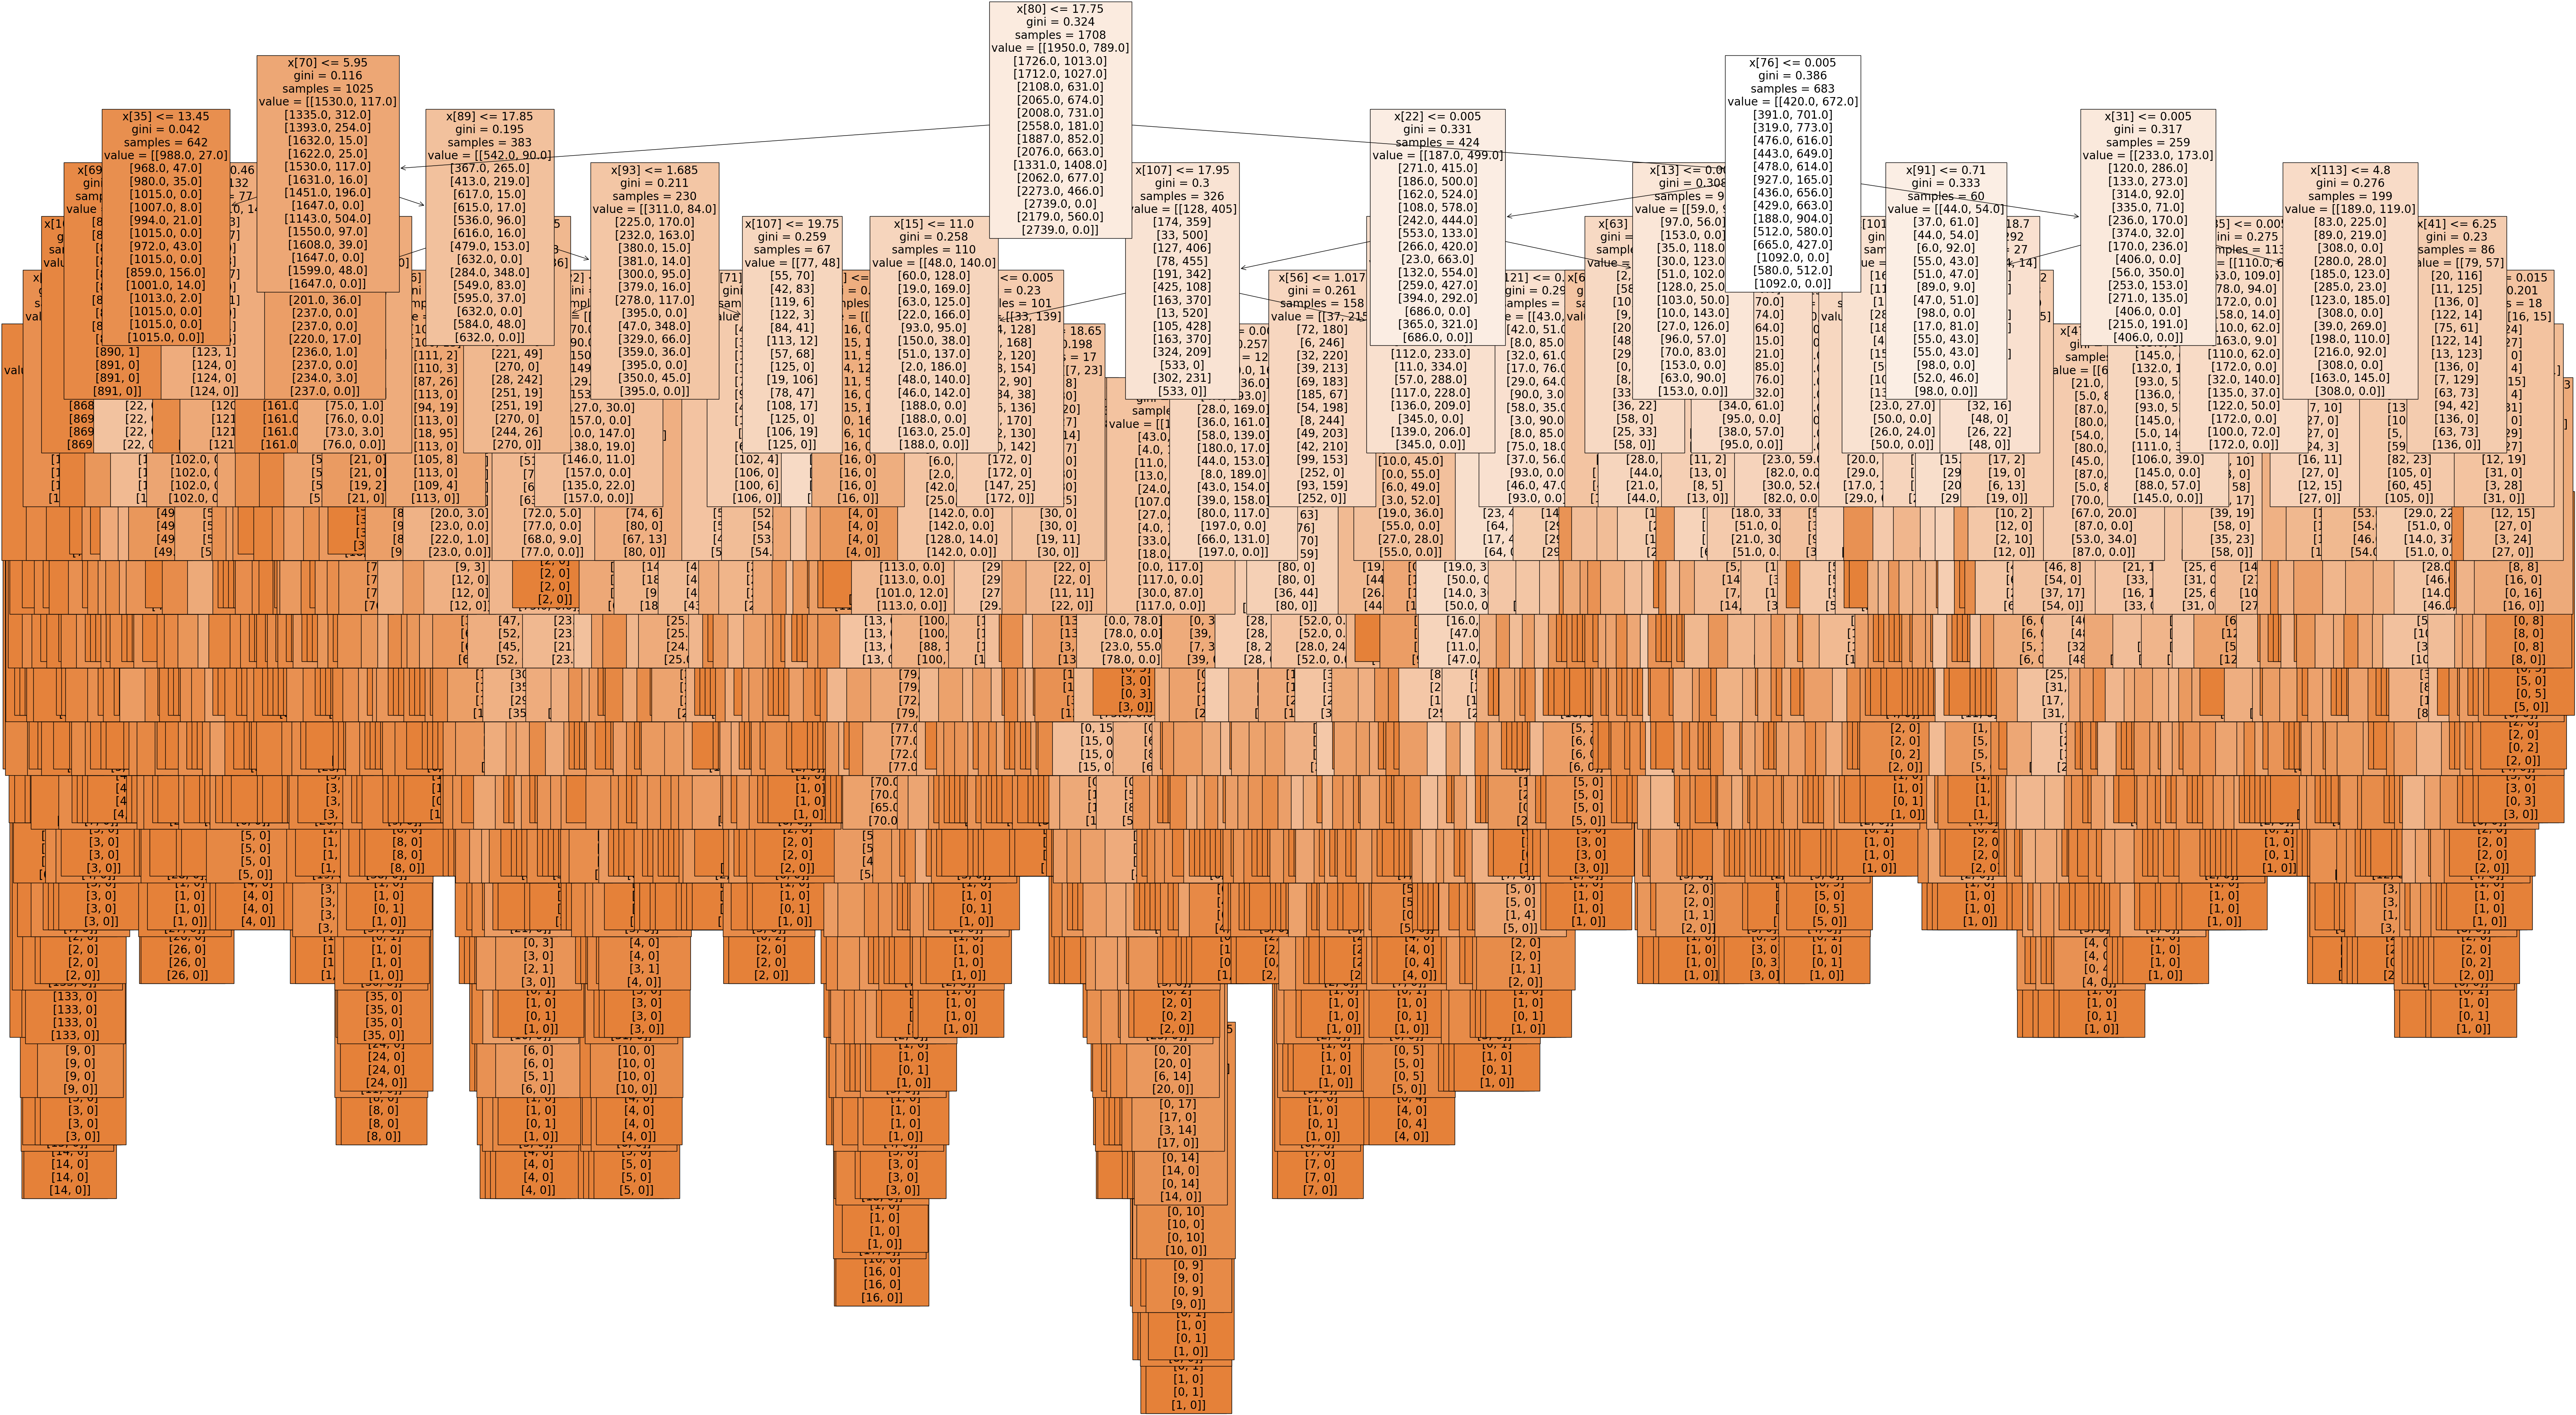

In [31]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [32]:
fig.savefig(os.path.join(path, 'Visualizations', 'random_forest_2011-2020.png'),bbox_inches='tight')

In [33]:
# Uncovering Feature Importances

In [34]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([3.77391208e-03, 4.42646623e-03, 3.07018525e-03, 3.56500223e-03,
       2.11113872e-02, 8.71823392e-03, 1.69449425e-02, 6.25943446e-03,
       5.07828604e-02, 3.87148694e-03, 3.12681138e-03, 4.64793669e-03,
       2.79627080e-03, 1.74734128e-02, 3.41313828e-03, 9.42068959e-03,
       5.61533297e-03, 9.73842573e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.13526929e-04, 1.47530865e-02, 1.01450943e-03,
       1.29374845e-02, 8.59726746e-03, 1.53918360e-02, 2.46218214e-03,
       3.32604970e-03, 5.78267895e-03, 6.49432396e-03, 1.80954429e-02,
       5.08263731e-03, 2.19090922e-02, 2.67402613e-03, 3.17638374e-02,
       3.68427779e-03, 3.66542665e-03, 4.29390725e-03, 3.91257440e-03,
       2.00444170e-02, 6.28255674e-03, 1.78467556e-02, 2.90495280e-03,
       3.91951809e-02, 2.44392733e-03, 3.92986118e-03, 3.70443261e-03,
       4.15255244e-03, 1.00911648e-02, 4.35170153e-03, 8.08268829e-03,
       2.96934133e-03, 1.78040003e-02, 2.26256279e-03, 2.22715758e-03,
      

In [35]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.77391208e-03, 4.42646623e-03, 3.07018525e-03, 3.56500223e-03,
         2.11113872e-02, 8.71823392e-03, 1.69449425e-02, 6.25943446e-03,
         5.07828604e-02],
        [3.87148694e-03, 3.12681138e-03, 4.64793669e-03, 2.79627080e-03,
         1.74734128e-02, 3.41313828e-03, 9.42068959e-03, 5.61533297e-03,
         9.73842573e-03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.13526929e-04,
         1.47530865e-02, 1.01450943e-03, 1.29374845e-02, 8.59726746e-03,
         1.53918360e-02],
        [2.46218214e-03, 3.32604970e-03, 5.78267895e-03, 6.49432396e-03,
         1.80954429e-02, 5.08263731e-03, 2.19090922e-02, 2.67402613e-03,
         3.17638374e-02],
        [3.68427779e-03, 3.66542665e-03, 4.29390725e-03, 3.91257440e-03,
         2.00444170e-02, 6.28255674e-03, 1.78467556e-02, 2.90495280e-03,
         3.91951809e-02],
        [2.44392733e-03, 3.92986118e-03, 3.70443261e-03, 4.15255244e-03,
         1.00911648e-02, 4.35170153e-03, 8.08268829e-03, 2.96934133

In [36]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.11865242, 0.06010351, 0.05360771, 0.09759027, 0.10183005,
       0.05752967, 0.02223952, 0.08418276, 0.08662104, 0.07278407,
       0.09179223, 0.06302281, 0.03123933, 0.05618117, 0.00262344])

In [37]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [38]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

BUDAPEST      0.118652
KASSEL        0.101830
HEATHROW      0.097590
MAASTRICHT    0.091792
SONNBLICK     0.086621
OSLO          0.084183
DEBILT        0.072784
MADRID        0.063023
STOCKHOLM     0.060104
BASEL         0.057530
DUSSELDORF    0.056181
VALENTIA      0.053608
LJUBLJANA     0.031239
MUNCHENB      0.022240
BELGRADE      0.002623
dtype: float64

In [39]:
df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['BUDAPEST', 'STOCKHOLM', 'VALENTIA', 'HEATHROW', 'KASSEL', 'BASEL', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'DEBILT', 'MAASTRICHT', 'MADRID', 'LJUBLJANA', 'DUSSELDORF', 'BELGRADE']


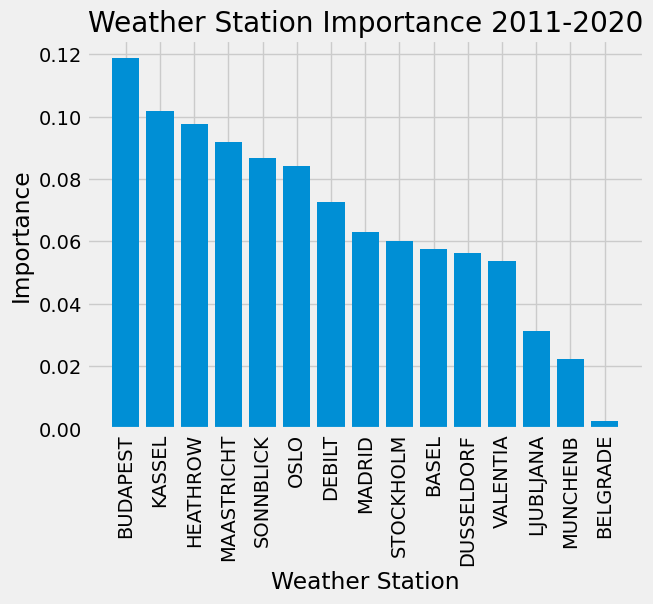

In [40]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2011-2020')

plt.savefig(os.path.join(path, 'Visualizations', '2011-2020_feature_importances.png'), bbox_inches='tight')

plt.show()